# Ensembles


In [1]:
from collections import Counter

from IPython.display import Image

from tqdm import tqdm

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

from sklearn.datasets import load_digits as load
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

----------
<h1 align="center">Bagging</h1> 


### Bagging

## $$a_{Bagging}(x) = \frac{1}{M}\sum_{i=1}^M a_i(x)$$

$a_i(x)$ trained on $X^i$

<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bagging.png?raw=1'>

In [2]:
digits = load()
X = digits.data
y = digits.target

f = X.shape[1]
rnd_d3 = DecisionTreeClassifier(max_features=int(f ** 0.5))
d3 = DecisionTreeClassifier()

In [8]:
Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [3]:
X.shape

(1797, 64)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [6]:
d3.fit(X, y)
d3.score(X, y)

1.0

In [9]:
print("Decision tree:", cross_val_score(d3, X, y).mean())

Decision tree: 0.7830099040544722


In [10]:
print("Bagging:", cross_val_score(BaggingClassifier(d3), X, y).mean())

Bagging: 0.8781584648715569


In [11]:
print("Randomized Bagging:", cross_val_score(BaggingClassifier(rnd_d3), X, y).mean())

Randomized Bagging: 0.9093252862890745


<h1 align="center">Bias-Variance Tradeoff</h1> 


<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_darts.png?raw=1' width=400>


<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_model_complex.png?raw=1'>


### Bias-Variance tradeoff

$$y = f(x) + \varepsilon$$

$$\varepsilon \sim N(0, \sigma^2)$$

$$y \sim N(f(x), \sigma^2)$$

<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_1.png?raw=1'>
<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_2.png?raw=1'>
<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_3.png?raw=1'>
<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_4.png?raw=1'>
<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/bv_5.png?raw=1'>

### Random Forest

### Random Forest from sklearn

In [12]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/girafe-ai/ml-course/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv",
    delimiter=',',
    header=None
).values

data = dataset[:, :-1].astype(int)
target = dataset[:, -1]


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 19) (549,) (297, 19) (297,)


In [13]:
Counter(y_train)

Counter({'saab': 141, 'bus': 136, 'van': 141, 'opel': 131})

In [15]:
rf = RandomForestClassifier(random_state=42, n_jobs=-2, oob_score=True)

cv_results = cross_val_score(rf, X_train, y_train)


print(f"Random Forest CV accuracy score: {cv_results.mean():.3f}")
print(f"Random Forest test accuracy score: {rf.fit(X_train, y_train).score(X_test, y_test):.3f}")

Random Forest CV accuracy score: 0.741
Random Forest test accuracy score: 0.734


In [17]:
rf.oob_score_

0.7304189435336976

In [18]:
lr = LogisticRegression()
cv_results = cross_val_score(lr, X_train, y_train)


print(f"Logirstic regression CV accuracy score: {cv_results.mean():.3f}")
print(f"Logirstic regression test accuracy score: {lr.fit(X_train, y_train).score(X_test, y_test):.3f}")

Logirstic regression CV accuracy score: 0.668
Logirstic regression test accuracy score: 0.724


In [19]:
print(f"Logirstic regression train accuracy score: {lr.score(X_train, y_train):.3f}")

Logirstic regression train accuracy score: 0.729


In [24]:
def run_experiment(model, X_train, y_train, X_test, y_test):
    cv_results = cross_val_score(model, X_train, y_train)
    model.fit(X_train, y_train)
    train_results = model.score(X_train, y_train)
    test_results = model.score(X_test, y_test)
    oob_results = None
    try:
        oob_results = model.oob_score_
    except AttributeError:
        pass
    return cv_results.mean(), train_results, test_results, oob_results

In [33]:
num_trees_list = np.linspace(5, 25, 20).astype(int)
cv_results_list, train_results_list, test_results_list, oob_results_list = [], [], [], []

for n_estimators in tqdm(num_trees_list):
    model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
    cv_results, train_results, test_results, oob_results = run_experiment(
        model,
        X_train,
        y_train,
        X_test,
        y_test
    )
    cv_results_list.append(cv_results.mean())
    train_results_list.append(train_results)
    test_results_list.append(test_results)
    oob_results_list.append(oob_results)

100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  8.43it/s]


In [34]:
num_trees_list

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 25])

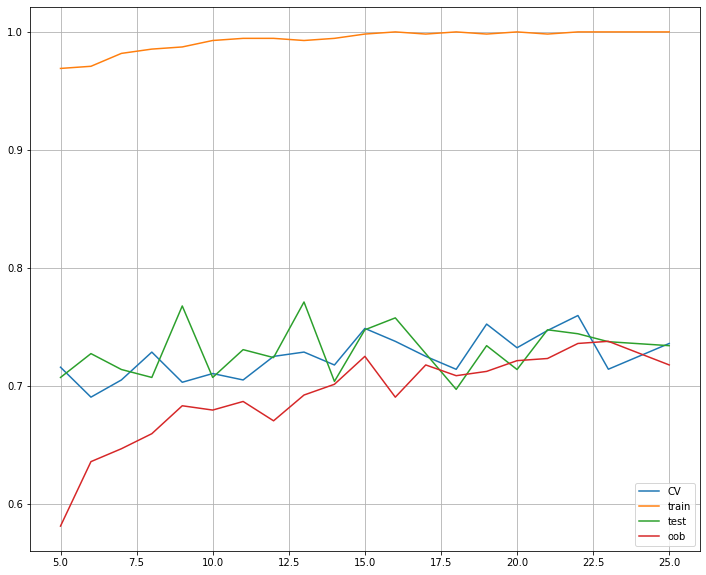

In [35]:
plt.figure(figsize=(12, 10))
plt.plot(num_trees_list, cv_results_list, label='CV')
plt.plot(num_trees_list, train_results_list, label='train')
plt.plot(num_trees_list, test_results_list, label='test')
plt.plot(num_trees_list, oob_results_list, label='oob')

plt.grid()
plt.legend()

### Out-of-bag error

<img src='https://github.com/girafe-ai/ml-course/blob/21f_basic/week0_05_trees_and_ensembles/img/oob.png?raw=1' width=700>